###By: Carly Muletz Wolz, JDM updates

###DADA2 pipeline and creating feature table, taxonomy table and sequence file for later analyses


#############  INITIAL processing of files in terminal to get this into dada2 format #############

##From basespace, the files are downloaded with each sample having a folder 
#and within that folder are the forward and reverse reads

##To make it compatible with dada2 and R we need to copy all the fastq files to one folder 
#Then you can delete the old folder that used to hold the reverse and forward reads. 

##You need to navigate to the project folder (most likely called FASTQ_Generation...) in terminal 

#cd /Users/lkgentry/Library/CloudStorage/OneDrive-SmithsonianInstitution/GrayferLabExperiments/XenoProbioticsBothRunsFastQ/XenoProbiotics-371840469/629625305
#Move all the files within each folders up one folder to the FASTQ files, which will then hold all
#of the fastq files in one main folder as opposed to per sample folders
#then remove the folders with nothing in them now, and unzip

#mv -v *ds*/* .     ### move all files within those folders that have L001 in them up one folder (forward and reverse reads) 

#rm -r *ds*/        ### remove all the empty folders

##YOU MUST UNZIP all of the files

#gunzip *_L001*

###############  INSTALL DADA2 if you don't already have it.  ################
###Follow tutorial on how to install (follow 1. and 2.) https://benjjneb.github.io/dada2/dada-installation.html

In [1]:
library(dada2)
packageVersion("dada2")

Loading required package: Rcpp



[1] ‘1.29.0’

###use if needed
###library(devtools)
###devtools::install_github("benjjneb/dada2")

########## DADA2 tutorial is very helpful: https://benjjneb.github.io/dada2/tutorial.html ##########

In [2]:
setwd("/media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131")

In [3]:
getwd()

[1] "/media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131"

In [4]:
path <- "/media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131"

In [5]:
list.files(path)

[1] "CF10D0_S92_L001_R1_001.fastq.gz"       
  [2] "CF10D0_S92_L001_R2_001.fastq.gz"       
  [3] "CF10W1_S187_L001_R1_001.fastq.gz"      
  [4] "CF10W1_S187_L001_R2_001.fastq.gz"      
  [5] "CF11D0_S19_L001_R1_001.fastq.gz"       
  [6] "CF11D0_S19_L001_R2_001.fastq.gz"       
  [7] "CF11W1_S305_L001_R1_001.fastq.gz"      
  [8] "CF11W1_S305_L001_R2_001.fastq.gz"      
  [9] "CF12D0_S28_L001_R1_001.fastq.gz"       
 [10] "CF12D0_S28_L001_R2_001.fastq.gz"       
 [11] "CF12W1_S306_L001_R1_001.fastq.gz"      
 [12] "CF12W1_S306_L001_R2_001.fastq.gz"      
 [13] "CF13D0_S250_L001_R1_001.fastq.gz"      
 [14] "CF13D0_S250_L001_R2_001.fastq.gz"      
 [15] "CF13W1_S307_L001_R1_001.fastq.gz"      
 [16] "CF13W1_S307_L001_R2_001.fastq.gz"      
 [17] "CF13W2_S208_L001_R1_001.fastq.gz"      
 [18] "CF13W2_S208_L001_R2_001.fastq.gz"      
 [19] "CF13W3_S211_L001_R1_001.fastq.gz"      
 [20] "CF13W3_S211_L001_R2_001.fastq.gz"      
 [21] "CF14D0_S93_L001_R1_001.fastq.gz"       
 [22] "CF14D0_S93_L001_R2_001.fastq.gz"       
 [23] "CF14W1_S46_L001_R1_001.fastq.gz"       
 [24] "CF14W1_S46_L001_R2_001.fastq.gz"       
 [25] "CF14W2_S57_L001_R1_001.fastq.gz"       
 [26] "CF14W2_S57_L001_R2_001.fastq.gz"       
 [27] "CF14W3_S72_L001_R1_001.fastq.gz"       
 [28] "CF14W3_S72_L001_R2_001.fastq.gz"       
 [29] "CF15D0_S107_L001_R1_001.fastq.gz"      
 [30] "CF15D0_S107_L001_R2_001.fastq.gz"      
 [31] "CF15W1_S308_L001_R1_001.fastq.gz"      
 [32] "CF15W1_S308_L001_R2_001.fastq.gz"      
 [33] "CF15W2_S205_L001_R1_001.fastq.gz"      
 [34] "CF15W2_S205_L001_R2_001.fastq.gz"      
 [35] "CF15W3_S317_L001_R1_001.fastq.gz"      
 [36] "CF15W3_S317_L001_R2_001.fastq.gz"      
 [37] "CF16D0_S29_L001_R1_001.fastq.gz"       
 [38] "CF16D0_S29_L001_R2_001.fastq.gz"       
 [39] "CF16W1_S267_L001_R1_001.fastq.gz"      
 [40] "CF16W1_S267_L001_R2_001.fastq.gz"      
 [41] "CF16W2_S58_L001_R1_001.fastq.gz"       
 [42] "CF16W2_S58_L001_R2_001.fastq.gz"       
 [43] "CF16W3_S73_L001_R1_001.fastq.gz"       
 [44] "CF16W3_S73_L001_R2_001.fastq.gz"       
 [45] "CF17D0_S251_L001_R1_001.fastq.gz"      
 [46] "CF17D0_S251_L001_R2_001.fastq.gz"      
 [47] "CF17W1_S266_L001_R1_001.fastq.gz"      
 [48] "CF17W1_S266_L001_R2_001.fastq.gz"      
 [49] "CF17W2_S59_L001_R1_001.fastq.gz"       
 [50] "CF17W2_S59_L001_R2_001.fastq.gz"       
 [51] "CF17W3_S74_L001_R1_001.fastq.gz"       
 [52] "CF17W3_S74_L001_R2_001.fastq.gz"       
 [53] "CF18D0_S30_L001_R1_001.fastq.gz"       
 [54] "CF18D0_S30_L001_R2_001.fastq.gz"       
 [55] "CF18W1_S265_L001_R1_001.fastq.gz"      
 [56] "CF18W1_S265_L001_R2_001.fastq.gz"      
 [57] "CF18W2_S324_L001_R1_001.fastq.gz"      
 [58] "CF18W2_S324_L001_R2_001.fastq.gz"      
 [59] "CF18W3_S212_L001_R1_001.fastq.gz"      
 [60] "CF18W3_S212_L001_R2_001.fastq.gz"      
 [61] "CF1D0_S25_L001_R1_001.fastq.gz"        
 [62] "CF1D0_S25_L001_R2_001.fastq.gz"        
 [63] "CF1W1_S44_L001_R1_001.fastq.gz"        
 [64] "CF1W1_S44_L001_R2_001.fastq.gz"        
 [65] "CF2D0_S246_L001_R1_001.fastq.gz"       
 [66] "CF2D0_S246_L001_R2_001.fastq.gz"       
 [67] "CF2W1_S181_L001_R1_001.fastq.gz"       
 [68] "CF2W1_S181_L001_R2_001.fastq.gz"       
 [69] "CF3D0_S105_L001_R1_001.fastq.gz"       
 [70] "CF3D0_S105_L001_R2_001.fastq.gz"       
 [71] "CF3W1_S204_L001_R1_001.fastq.gz"       
 [72] "CF3W1_S204_L001_R2_001.fastq.gz"       
 [73] "CF4D0_S248_L001_R1_001.fastq.gz"       
 [74] "CF4D0_S248_L001_R2_001.fastq.gz"       
 [75] "CF4W1_S294_L001_R1_001.fastq.gz"       
 [76] "CF4W1_S294_L001_R2_001.fastq.gz"       
 [77] "CF5D0_S247_L001_R1_001.fastq.gz"       
 [78] "CF5D0_S247_L001_R2_001.fastq.gz"       
 [79] "CF5W1_S193_L001_R1_001.fastq.gz"       
 [80] "CF5W1_S193_L001_R2_001.fastq.gz"       
 [81] "CF6D0_S26_L001_R1_001.fastq.gz"        
 [82] "CF6D0_S26_L001_R2_001.fastq.gz"        
 [83] "CF6W1_S45_L001_R1_001.fastq.gz"        
 [84] "CF6W1_S45_L001_R2_001.fastq.gz"        
 [85] "CF7D0_S91_L001_R1_001.fastq.gz"        
 [86] "

#FILTER AND TRIM 


#Forward and reverse fastq filenames have format: SAMPLENAME_R1_001.fastq and SAMPLENAME_R2_001.fastq


In [6]:
fnFs <- sort(list.files(path, pattern="_R1_001.fastq", full.names = TRUE))
fnRs <- sort(list.files(path, pattern="_R2_001.fastq", full.names = TRUE))

#Extract sample names, assuming filenames have format: SAMPLENAME_XXX.fastq

In [7]:
sample.names <- sapply(strsplit(basename(fnFs), "_"), `[`, 1)

#INSPECTION OF QUALITY PROFILES

In [8]:
qualityforward <- plotQualityProfile(fnFs[8:16])
qualityreverse <- plotQualityProfile(fnRs[8:16])


In [9]:
tiff("qualityforward.tiff", width = 325, height = 250, compression="lzw", units="mm", res=400)


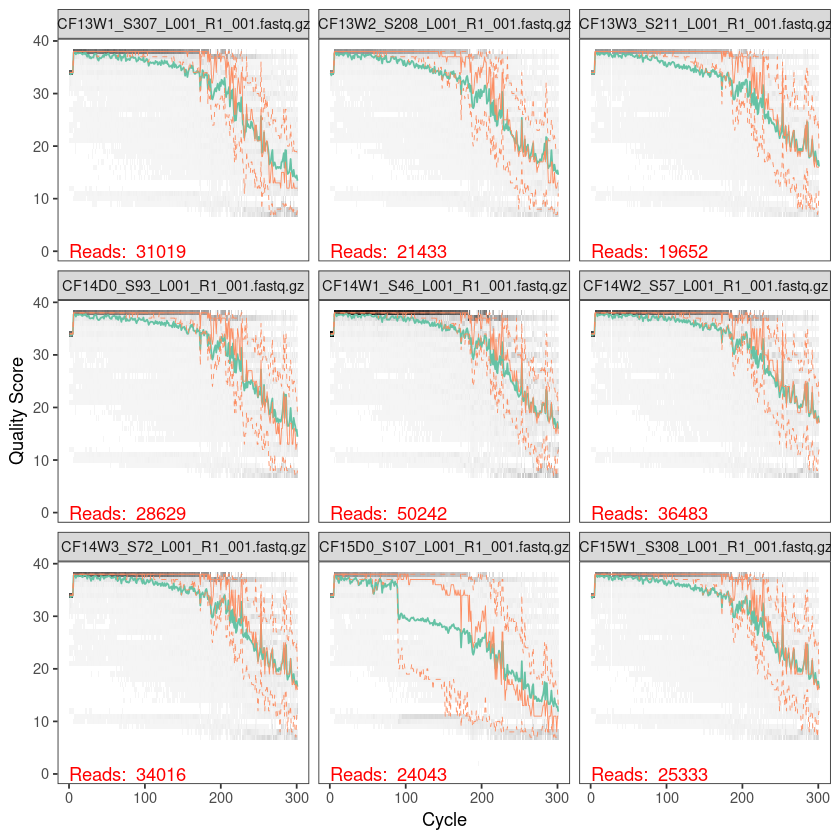

In [10]:
qualityforward

In [11]:
dev.off()

tiff 
   3

In [12]:
tiff("qualityreverse.tiff", width = 325, height = 250, compression="lzw", units="mm", res=400)

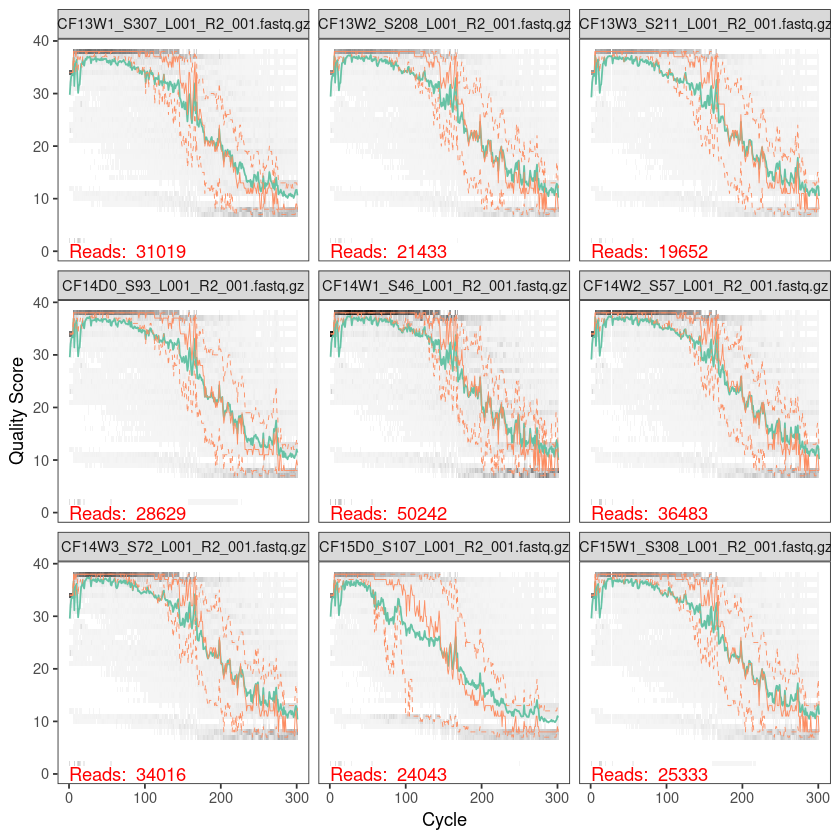

In [13]:
qualityreverse

In [1]:
dev.off()

null device 
          1

##Quality looks ok, starts dropping on reverse around 150
##Since need to trim forward primer off 19 bp, will do 275. We want 450 bp merged

#FILTERING AND TRIMMING 

In [4]:
filtFs <- file.path(path, "filtered", paste0(sample.names, "_F_filt.fastq.gz"))
filtRs <- file.path(path, "filtered", paste0(sample.names, "_R_filt.fastq.gz"))

ERROR: Error in file.path(path, "filtered", paste0(sample.names, "_F_filt.fastq.gz")): object 'path' not found


##parameters for filtering data

##Not uncommon to lose 6 to 10k sequences between reads.in and reads.out
##maxee to 2,5 with low quality samples. This loosens the parameters with the reverse reads

#matchIDs=TRUE included to enforce read matching. Multithread turned off.

In [16]:
out2 <- filterAndTrim(fnFs, filtFs, fnRs, filtRs, truncLen=c(260,190),
                      maxN=0, maxEE=c(2,5), trimLeft = 19, trimRight = 23, 
                      truncQ=2, rm.phix=TRUE, matchIDs=TRUE,
                      compress=TRUE, multithread=FALSE)

In [17]:
head(out2)

,reads.in,reads.out
CF10D0_S92_L001_R1_001.fastq.gz,18948,12494
CF10W1_S187_L001_R1_001.fastq.gz,18059,12073
CF11D0_S19_L001_R1_001.fastq.gz,17232,12078
CF11W1_S305_L001_R1_001.fastq.gz,25508,16859
CF12D0_S28_L001_R1_001.fastq.gz,26530,17649
CF12W1_S306_L001_R1_001.fastq.gz,31306,19284


In [18]:
out2

,reads.in,reads.out
CF10D0_S92_L001_R1_001.fastq.gz,18948,12494
CF10W1_S187_L001_R1_001.fastq.gz,18059,12073
CF11D0_S19_L001_R1_001.fastq.gz,17232,12078
CF11W1_S305_L001_R1_001.fastq.gz,25508,16859
CF12D0_S28_L001_R1_001.fastq.gz,26530,17649
CF12W1_S306_L001_R1_001.fastq.gz,31306,19284
CF13D0_S250_L001_R1_001.fastq.gz,11358,5953
CF13W1_S307_L001_R1_001.fastq.gz,31019,18408
CF13W2_S208_L001_R1_001.fastq.gz,21433,11129
CF13W3_S211_L001_R1_001.fastq.gz,19652,12389


In [19]:
str(out2)

 num [1:264, 1:2] 18948 18059 17232 25508 26530 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:264] "CF10D0_S92_L001_R1_001.fastq.gz" "CF10W1_S187_L001_R1_001.fastq.gz" "CF11D0_S19_L001_R1_001.fastq.gz" "CF11W1_S305_L001_R1_001.fastq.gz" ...
  ..$ : chr [1:2] "reads.in" "reads.out"


In [20]:
mean(out2[,2])

[1] 14006.6

In [21]:
mean(out2[,1])

[1] 22171.84

##an average pf 80% with this is good. Concatenated runs 0.4379666 (44%

In [22]:
mean(out2[,2])/mean(out2[,1])

[1] 0.6317293

##If comes back as zero, you have to remove the main fastq sequencing file to learn errors and start again

In [23]:
table(file.exists(filtFs))


TRUE 
 264 

In [24]:
table(file.exists(filtRs))


TRUE 
 264 

##Run 1- Manually had to remove PXC100522 sample and NPC1006222

##Run 2- Manually had to remove NXC92722

##NEED to run whichever parameter last so that filtFs and filtRs are from this

##GOING with out2

In [25]:
errF <- learnErrors(filtFs, multithread=FALSE)

105340859 total bases in 437099 reads from 26 samples will be used for learning the error rates.


In [26]:
errR <- learnErrors(filtRs, multithread=FALSE)

100010718 total bases in 584858 reads from 38 samples will be used for learning the error rates.


In [27]:
plotErrorsF <- plotErrors(errF, nominalQ=TRUE)
plotErrorsR <- plotErrors(errR, nominalQ=TRUE)

In [28]:
tiff("plotErrorsF.tiff", width = 325, height = 250, compression="lzw", units="mm", res=400)

Warning message:
“Transformation introduced infinite values in continuous y-axis”


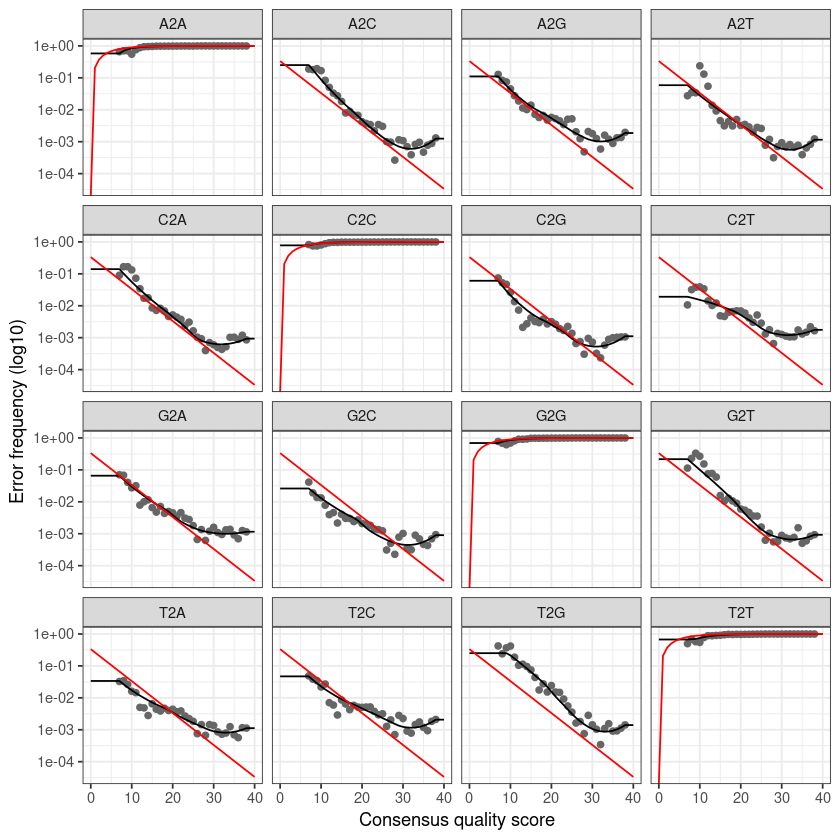

In [29]:
plotErrorsF

In [30]:
dev.off()

tiff 
   3

In [31]:
tiff("plotErrorsR.tiff", width = 325, height = 250, compression="lzw", units="mm", res=400)

Warning message:
“Transformation introduced infinite values in continuous y-axis”


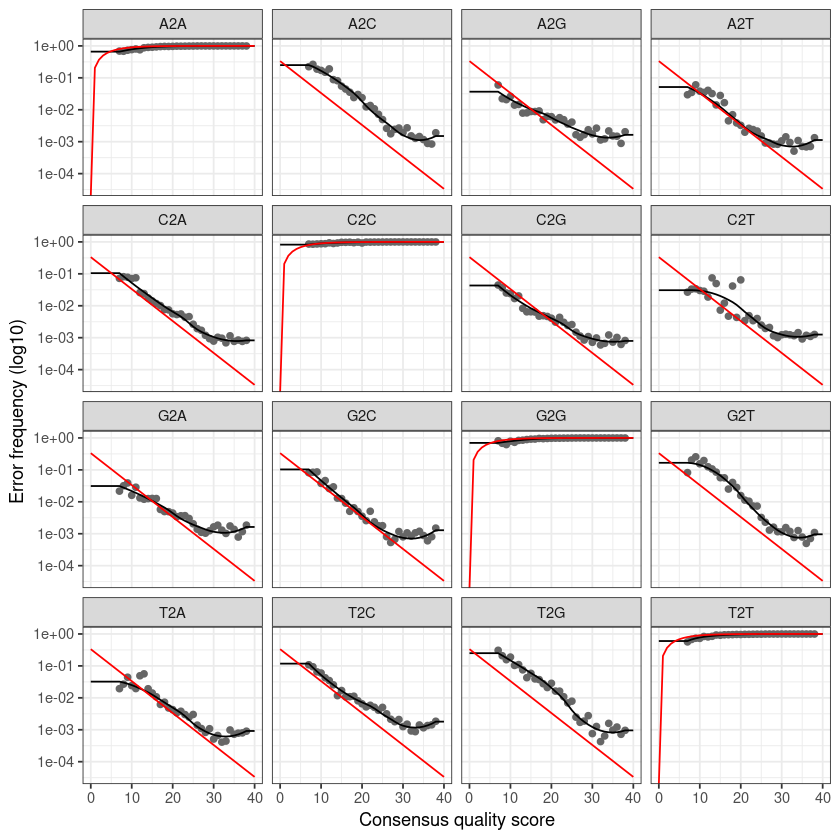

In [32]:
plotErrorsR

In [33]:
dev.off()

tiff 
   3

#errors look good for this run. Should follow black line closely

In [34]:
derepFs <- derepFastq(filtFs, verbose=TRUE)
derepRs <- derepFastq(filtRs, verbose=TRUE)

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/CF10D0_F_filt.fastq.gz

Encountered 3526 unique sequences from 12494 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/CF10W1_F_filt.fastq.gz

Encountered 3180 unique sequences from 12073 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/CF11D0_F_filt.fastq.gz

Encountered 3151 unique sequences from 12078 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generat

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/CF18W3_F_filt.fastq.gz

Encountered 2039 unique sequences from 5227 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/CF1D0_F_filt.fastq.gz

Encountered 3707 unique sequences from 14798 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/CF1W1_F_filt.fastq.gz

Encountered 5644 unique sequences from 20586 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/NXC100522_F_filt.fastq.gz

Encountered 18 unique sequences from 20 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/NXC101322_F_filt.fastq.gz

Encountered 15 unique sequences from 17 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/NXC10322_F_filt.fastq.gz

Encountered 2033 unique sequences from 7512 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P1F17W2_F_filt.fastq.gz

Encountered 4988 unique sequences from 21433 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P1F17W3_F_filt.fastq.gz

Encountered 7023 unique sequences from 32171 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P1F18D0_F_filt.fastq.gz

Encountered 1629 unique sequences from 4331 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Gener

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P2F12W1_F_filt.fastq.gz

Encountered 5377 unique sequences from 24869 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P2F13D0_F_filt.fastq.gz

Encountered 4858 unique sequences from 17788 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P2F13W1_F_filt.fastq.gz

Encountered 5372 unique sequences from 26078 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Gene

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P2F3D0_F_filt.fastq.gz

Encountered 1173 unique sequences from 3585 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P2F3W1_F_filt.fastq.gz

Encountered 2863 unique sequences from 9588 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P2F4D0_F_filt.fastq.gz

Encountered 1299 unique sequences from 2389 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P3F15W1_F_filt.fastq.gz

Encountered 3231 unique sequences from 13418 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P3F15W2_F_filt.fastq.gz

Encountered 4904 unique sequences from 20915 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P3F15W3_F_filt.fastq.gz

Encountered 3197 unique sequences from 11247 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Gene

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P3F8D0_F_filt.fastq.gz

Encountered 3576 unique sequences from 9624 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P3F8W1_F_filt.fastq.gz

Encountered 6329 unique sequences from 24639 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P3F9D0_F_filt.fastq.gz

Encountered 1765 unique sequences from 4245 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generatio

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P4F17W3_F_filt.fastq.gz

Encountered 5565 unique sequences from 22134 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P4F18D0_F_filt.fastq.gz

Encountered 3251 unique sequences from 7773 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P4F18W1_F_filt.fastq.gz

Encountered 3592 unique sequences from 10738 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Gener

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/PXC91322_F_filt.fastq.gz

Encountered 2336 unique sequences from 5314 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/PXC92222_F_filt.fastq.gz

Encountered 1551 unique sequences from 3365 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/PXC92722_F_filt.fastq.gz

Encountered 6578 unique sequences from 29874 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Gen

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/CF18D0_R_filt.fastq.gz

Encountered 7303 unique sequences from 21115 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/CF18W1_R_filt.fastq.gz

Encountered 4958 unique sequences from 15334 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/CF18W2_R_filt.fastq.gz

Encountered 8732 unique sequences from 23462 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generat

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/NPC1017221_R_filt.fastq.gz

Encountered 28 unique sequences from 34 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/NPC1017222_R_filt.fastq.gz

Encountered 28 unique sequences from 30 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/NPC91522_R_filt.fastq.gz

Encountered 50 unique sequences from 56 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P1F16W3_R_filt.fastq.gz

Encountered 11733 unique sequences from 33004 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P1F17D0_R_filt.fastq.gz

Encountered 2531 unique sequences from 6797 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P1F17W1_R_filt.fastq.gz

Encountered 616 unique sequences from 1734 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Genera

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P2F11D0_R_filt.fastq.gz

Encountered 971 unique sequences from 2132 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P2F11W1_R_filt.fastq.gz

Encountered 364 unique sequences from 992 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P2F12D0_R_filt.fastq.gz

Encountered 3476 unique sequences from 10129 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generatio

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P2F1W1_R_filt.fastq.gz

Encountered 6543 unique sequences from 21505 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P2F2D0_R_filt.fastq.gz

Encountered 1823 unique sequences from 5229 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P2F2W1_R_filt.fastq.gz

Encountered 6706 unique sequences from 21959 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generati

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P3F14W2_R_filt.fastq.gz

Encountered 8792 unique sequences from 24415 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P3F14W3_R_filt.fastq.gz

Encountered 9792 unique sequences from 25859 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P3F15D0_R_filt.fastq.gz

Encountered 7533 unique sequences from 19029 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Gene

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P3F6W1_R_filt.fastq.gz

Encountered 9312 unique sequences from 30934 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P3F7D0_R_filt.fastq.gz

Encountered 5512 unique sequences from 14732 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P3F7W1_R_filt.fastq.gz

Encountered 5457 unique sequences from 14924 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generat

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P4F17D0_R_filt.fastq.gz

Encountered 3041 unique sequences from 8055 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P4F17W1_R_filt.fastq.gz

Encountered 5272 unique sequences from 21810 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/P4F17W2_R_filt.fastq.gz

Encountered 5636 unique sequences from 21399 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Gener

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/PXC100522_R_filt.fastq.gz

Encountered 2 unique sequences from 2 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/PXC101322_R_filt.fastq.gz

Encountered 9360 unique sequences from 24038 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131/filtered/PXC10322_R_filt.fastq.gz

Encountered 7543 unique sequences from 23378 total sequences read.

Dereplicating sequence entries in Fastq file: /media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Genera

#Name the derep-class objects by the sample names

In [35]:
names(derepFs) <- sample.names
names(derepRs) <- sample.names

In [36]:
dadaFs <- dada(derepFs, err=errF, multithread=FALSE)

Sample 1 - 12494 reads in 3526 unique sequences.
Sample 2 - 12073 reads in 3180 unique sequences.
Sample 3 - 12078 reads in 3151 unique sequences.
Sample 4 - 16859 reads in 4744 unique sequences.
Sample 5 - 17649 reads in 4482 unique sequences.
Sample 6 - 19284 reads in 4862 unique sequences.
Sample 7 - 5953 reads in 1777 unique sequences.
Sample 8 - 18408 reads in 4856 unique sequences.
Sample 9 - 11129 reads in 3784 unique sequences.
Sample 10 - 12389 reads in 3655 unique sequences.
Sample 11 - 18075 reads in 4960 unique sequences.
Sample 12 - 33238 reads in 7636 unique sequences.
Sample 13 - 25107 reads in 5837 unique sequences.
Sample 14 - 22598 reads in 5667 unique sequences.
Sample 15 - 9458 reads in 2835 unique sequences.
Sample 16 - 16595 reads in 4715 unique sequences.
Sample 17 - 2635 reads in 1398 unique sequences.
Sample 18 - 17423 reads in 5508 unique sequences.
Sample 19 - 22743 reads in 5968 unique sequences.
Sample 20 - 13024 reads in 3906 unique sequences.
Sample 21 - 

In [37]:
dadaFs[[1]]

sequence,abundance,n0,n1,nunq,pval,birth_from,birth_pval,birth_fold,birth_ham,birth_qave
<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
TACGGAGGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTCCGTAGGCGGGCTTATAAGTCAGTGGTGAAATCTCGATGCTTAACATCGAAACTGCCATTGATACTGTAAGCCTTGAGTAAGGTAGAGGTAGCTGGAATGAGTAGTGTAGCGGTGAAATGCATAGATATTACTCGGAACACCGATTGCGAAGGCAGGTTACCATGTCTTAACTGACGCTGATGGACGAAAGCGTGG,1501,1041,309,311,0,NA,NA,NA,NA,NA
TACGAAGGTCCCGAGCGTTGTTCGGAATCACTGGGCGTAAAGGGAGCGTAGGCGGTATGGTAAGTCAGATGTGAAATCCTGGGGCTCAACCTCAGAACTGCATCCGATACTGCCGTGCTAGAAGACTGGAGAGGTGAGTGGAATTCTCGGTGTAGCAGTGAAATGCGTGGATATCGAGAGGAAGACCAGTTGCGAAAGCGACTCACTGGACAGTACTTGACGCTGAGGCTCGAAGGCTAGG,1423,1029,289,257,0,1,0,1.695351e+212,73,35.83562
TACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGTGGTTTTTTAAGTCAGAAGTGAAAGGCTACGGCTCAACCGTAGTAAGCTTTTGAAACTGAAGAACTTGAGTGCAGGAGAGGAGAGTAGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAATACCAGTAGCGAAGGCGGCTCTCTGGACTGTAACTGACACTGAGGCACGAAAGCGTGGG,1508,989,353,325,0,1,0,8.690877e+134,46,36.28261
TACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGTGGTTTCTTAAGTCAGAAGTGAAAGGCTACGGCTCAACCGTAGTAAGCTTTTGAAACTGAGAAACTTGAGTGCAGGAGAGGAGAGTAGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAATACCAGTTGCGAAGGCGGCTCTCTGGACTGTAACTGACACTGAGGCACGAAAGCGTGGG,1445,979,316,288,0,3,0,1.976650e+11,4,37.25000
TACGGAGGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTCCGTAGGCGGATTAATAAGTCAGTGGTGAAATCTCATAGCTTAACTATGAAACTGCCATTGATACTGTTAGTCTTGAGTGTAGTTGAGGTAGCTGGAATGAGTAGTGTAGCGGTGAAATGCATAGATATTACTCAGAACACCAATTGCGAAGGCAAGTTACCAAGTTACAACTGACGCTGATGGACGAAAGCGTGG,637,434,136,149,0,1,0,2.414336e+46,16,36.00000
TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTATGCAAGACAGGTGTGAAATCCCCGGGCTTAACCTGGGAACTGCACTTGTGACTGCATAGCTAGAGTACGGCAGAGGGGGATGGAATTCCGCGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCGATGGCGAAGGCAATCCCCTGGGCCTGTACTGACGCTCATGCACGAAAGCGTGG,568,364,143,155,0,1,0,1.849942e+158,54,36.48148
TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTATGTAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCATAGCTTGAGTGCGGCAGAGGGGGATGGAATTCCGCGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCGATGGCGAAGGCAATCCCCTGGGCCTGCACTGACGCTCATGCACGAAAGCGTGG,516,341,117,131,0,6,0,1.025853e+25,9,37.11111
TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTGTGCAAGACAGGTGTGAAATCCCCGGGCTTAACCTGGGAACTGCACTTGTGACTGCATAGCTAGAGTACGGCAGAGGGGGATGGAATTCCGCGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCGATGGCGAAGGCAATCCCCTGGGCCTGTACTGACGCTCATGCACGAAAGCGTGG,331,217,83,90,0,6,0,1.460532e+02,1,38.00000
TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGCGTAAAGGGAGCGTAGGCGGACTTTTAAGTGAGATGTGAAATACCCGGGCTCAACCTGGGTGCTGCATTTCAAACTGGAAGTCTAGAGTGCAGGAGAGGAGAATGGAATTCCTAGTGTAGCGGTGAAATGCGTAGAGATTAGGAAGAACACCAGTGGCGAAGGCGATTCTCTGGACTGTAACTGACGCTGAGGCTCGAAAGCGTGG,270,189,50,72,0,1,0,4.904556e+151,52,36.67308


#dada-class: object describing DADA2 denoising results
#156 sequence variants were inferred from 4108 input unique sequences.
#Key parameters: OMEGA_A = 1e-40, OMEGA_C = 1e-40, BAND_SIZE = 16

In [38]:
dadaRs <- dada(derepRs, err=errR, multithread=FALSE)

Sample 1 - 12494 reads in 4550 unique sequences.
Sample 2 - 12073 reads in 4792 unique sequences.
Sample 3 - 12078 reads in 5033 unique sequences.
Sample 4 - 16859 reads in 5614 unique sequences.
Sample 5 - 17649 reads in 5760 unique sequences.
Sample 6 - 19284 reads in 6525 unique sequences.
Sample 7 - 5953 reads in 2119 unique sequences.
Sample 8 - 18408 reads in 6091 unique sequences.
Sample 9 - 11129 reads in 3900 unique sequences.
Sample 10 - 12389 reads in 4659 unique sequences.
Sample 11 - 18075 reads in 5879 unique sequences.
Sample 12 - 33238 reads in 9774 unique sequences.
Sample 13 - 25107 reads in 7690 unique sequences.
Sample 14 - 22598 reads in 7673 unique sequences.
Sample 15 - 9458 reads in 3495 unique sequences.
Sample 16 - 16595 reads in 6181 unique sequences.
Sample 17 - 2635 reads in 976 unique sequences.
Sample 18 - 17423 reads in 5772 unique sequences.
Sample 19 - 22743 reads in 7113 unique sequences.
Sample 20 - 13024 reads in 4640 unique sequences.
Sample 21 - 2

In [39]:
dadaRs[[1]]

sequence,abundance,n0,n1,nunq,pval,birth_from,birth_pval,birth_fold,birth_ham,birth_qave
<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
ATTCCTTTGAGTTTCACTCTTGCGAGCGTACTTCCCAGGCGGAGTACTTAATGCGTTAGCTGCGCCACCGAAGGGGGTAACCTCCGACAGCTAGTACTCATCGTTTACGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGTGCCTCAGTGTCAGT,1803,947,488,484,0,NA,NA,NA,NA,NA
ATTCCTTTGAGTTTCATTCTTGCGAACGTACTCCCCAGGTGGCTAACTTATCACTTTCGCTTAGTCTCTGAAGCTTATGCCCCAAAAACGAGTTAGCATCGTTTACGGCGTGGACTACCAGGGTATCTAATCCTGTTCGCTCCCCACGCTTTCGTCCATCAGCGTCAGTTA,1505,859,329,444,0,1,0,1.976127e+96,33,36.72727
ATTCCTTTGAGTTTCACTCTTGCGAGCGTACTTCCCAGGCGGAGTACTTAATGCGTTAGCTGCGGCACCGAGGGGGGTAACCCCCGACACCTAGTACTCATCGTTTACGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGTGCCTCAGTGTCAGT,1505,777,404,435,0,1,0,7.124596e+10,4,37.00000
ATTTCTTTGAGTTTTAGTCTTGCGACCGTACTTCCCAGGCGGCACGCTTAACGCGTTTGCTCCGGCACAGAAGGGGTCGAACCCTCCTACACCAAGCGTGCACCGTTTACTGCTAGGACTACAGGGGTATCTAATCCCTTTTGCTCCCCTAGCCTTCGAGCCTCAGCGTCA,1424,756,362,435,0,1,0,4.376372e+102,35,35.88571
ATTCCTTTGAGTTTCAACCTTGCGGCCGTACTCCCCAGGCGGTCAACTTCACGCGTTAGCTTCGTTACTGAACAGCAAGCCGTCCAACAACCAGTTGACATCGTTTAGGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGTGCATGAGCGTCAGT,1131,583,260,389,0,1,0,4.712793e+83,29,36.20690
ATTCCTTTGAGTTTCACTCTTGCGAGCGTACTCCCCAGGTGGCTAACTTATCACTTTCGCTTGGTCTCTGAAGTTTTACCCCCAAAAACGAGTTAGCATCGTTTACAGCGTGGACTACCAGGGTATCTAATCCTGTTCGCTCCCCACGCTTTCGTCCATCAGCGTCAGTTG,635,382,136,200,0,2,0,2.374649e+25,9,36.55556
ATTCCTTTGAGTTTCAACCTTGCGGCCGTACTCCCCAGGCGGTCAACTTCACGCGTTAGCTTCGTTACTGAGAAGAAACCCTCCCAACAACCAGTTGACATCGTTTAGGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGTGCATGAGCGTCAGT,574,296,136,212,0,5,0,1.224288e+17,6,36.83333
ATTCCTTTGAGTTTCAACCTTGCGGCCGTACTCCCCAGGCGGTCAACTTCACGCGTTAGCTTCGTTACTGAGTCAGTGAAGACCCAACAACCAGTTGACATCGTTTAGGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGTGCATGAGCGTCAGT,427,220,102,160,0,7,0,3.568066e+17,6,36.83333
ATTCCTTTGAGTTTCAACCTTGCGGCCGTACTCCCCAGGCGGTCAACTTCACGCGTTAGCTACGTTACTGAGAAGAAACCCTCCCAACAACCAGTTGACATCGTTTAGGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGTGCATGAGCGTCAGT,334,167,88,122,0,7,0,3.552759e+02,1,37.00000


#dada-class: object describing DADA2 denoising results
#89 sequence variants were inferred from 5124 input unique sequences.
#Key parameters: OMEGA_A = 1e-40, OMEGA_C = 1e-40, BAND_SIZE = 16

In [40]:
mergers <- mergePairs(dadaFs, derepFs, dadaRs, derepRs, verbose=TRUE)

12008 paired-reads (in 147 unique pairings) successfully merged out of 12131 (in 206 pairings) input.

11440 paired-reads (in 123 unique pairings) successfully merged out of 11743 (in 267 pairings) input.

11463 paired-reads (in 176 unique pairings) successfully merged out of 11681 (in 252 pairings) input.

15969 paired-reads (in 211 unique pairings) successfully merged out of 16305 (in 401 pairings) input.

16994 paired-reads (in 165 unique pairings) successfully merged out of 17211 (in 278 pairings) input.

18530 paired-reads (in 167 unique pairings) successfully merged out of 18871 (in 307 pairings) input.

5731 paired-reads (in 81 unique pairings) successfully merged out of 5765 (in 97 pairings) input.

17782 paired-reads (in 146 unique pairings) successfully merged out of 18137 (in 280 pairings) input.

10498 paired-reads (in 161 unique pairings) successfully merged out of 10877 (in 375 pairings) input.

11786 paired-reads (in 167 unique pairings) successfully merged out of 12111 

20023 paired-reads (in 317 unique pairings) successfully merged out of 20771 (in 746 pairings) input.

7009 paired-reads (in 109 unique pairings) successfully merged out of 7269 (in 241 pairings) input.

30514 paired-reads (in 550 unique pairings) successfully merged out of 32527 (in 1647 pairings) input.

6479 paired-reads (in 83 unique pairings) successfully merged out of 6562 (in 134 pairings) input.

1566 paired-reads (in 40 unique pairings) successfully merged out of 1641 (in 77 pairings) input.

19969 paired-reads (in 384 unique pairings) successfully merged out of 21062 (in 962 pairings) input.

29698 paired-reads (in 607 unique pairings) successfully merged out of 31698 (in 1703 pairings) input.

4107 paired-reads (in 89 unique pairings) successfully merged out of 4134 (in 100 pairings) input.

455 paired-reads (in 24 unique pairings) successfully merged out of 465 (in 31 pairings) input.

25657 paired-reads (in 445 unique pairings) successfully merged out of 26510 (in 1023 pai

19878 paired-reads (in 166 unique pairings) successfully merged out of 20171 (in 292 pairings) input.

6098 paired-reads (in 73 unique pairings) successfully merged out of 6254 (in 163 pairings) input.

5039 paired-reads (in 100 unique pairings) successfully merged out of 5102 (in 131 pairings) input.

4171 paired-reads (in 101 unique pairings) successfully merged out of 4217 (in 141 pairings) input.

11272 paired-reads (in 173 unique pairings) successfully merged out of 11570 (in 351 pairings) input.

33810 paired-reads (in 560 unique pairings) successfully merged out of 35309 (in 1256 pairings) input.

13341 paired-reads (in 71 unique pairings) successfully merged out of 13506 (in 87 pairings) input.

20935 paired-reads (in 132 unique pairings) successfully merged out of 21201 (in 257 pairings) input.

23269 paired-reads (in 242 unique pairings) successfully merged out of 24028 (in 649 pairings) input.

25227 paired-reads (in 195 unique pairings) successfully merged out of 25646 (in 

9546 paired-reads (in 111 unique pairings) successfully merged out of 9757 (in 235 pairings) input.

9440 paired-reads (in 129 unique pairings) successfully merged out of 9683 (in 267 pairings) input.

17491 paired-reads (in 166 unique pairings) successfully merged out of 17899 (in 391 pairings) input.

9993 paired-reads (in 132 unique pairings) successfully merged out of 10127 (in 202 pairings) input.

16563 paired-reads (in 181 unique pairings) successfully merged out of 16892 (in 363 pairings) input.

10849 paired-reads (in 156 unique pairings) successfully merged out of 10996 (in 221 pairings) input.

23894 paired-reads (in 226 unique pairings) successfully merged out of 24438 (in 502 pairings) input.

16252 paired-reads (in 198 unique pairings) successfully merged out of 16538 (in 357 pairings) input.

23507 paired-reads (in 193 unique pairings) successfully merged out of 23960 (in 394 pairings) input.

7663 paired-reads (in 105 unique pairings) successfully merged out of 7915 (in

In [41]:
seqtab <- makeSequenceTable(mergers)

In [42]:
saveRDS(seqtab, "vJDM_XengPro2022_run2_seqtab.rds")

##Used out 1 parameters
#saveRDS(seqtab, "XengPro2022_run1_seqtab.rds")

#will merge this with file I create with run 2 data. Re-ran all previous code again with run2 files. Skip like 155 
#second run and save with code below

#saveRDS(seqtab, "vJDM_XengPro2022_run2_seqtab.rds")

##Had to install packages and updates below. If already installed, skip to line 164

#if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

#if (!requireNamespace("BiocManager", quietly = TRUE))
install.packages("BiocManager")
#BiocManager::install("dada2", version = "3.16")

BiocManager::install("DECIPHER")

library(BiocManager)  
library(DECIPHER)
  
#Do this code later and see what it looks like

In [43]:
library(BiocManager)  
library(DECIPHER)

Bioconductor version '3.14' is out-of-date; the current release version '3.18'
  is available with R version '4.3'; see https://bioconductor.org/install

Loading required package: Biostrings

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loadin

#Merge multiple runs

In [44]:
st1 <- readRDS("vJDM_XengPro2022_run1_seqtab.rds")
st2 <- readRDS("vJDM_XengPro2022_run2_seqtab.rds")

##You get an error message "Duplicated sample names detected in rownames", but this is ok
##dada2 is just letting you know this

In [45]:
st.all <- mergeSequenceTables(st1, st2, repeats = "sum")

Duplicated sample names detected in the sequence table row names.



In [46]:
dim(st.all)

[1]  265 9242

##Distribution of amplicon sizes in bp

In [47]:
table(nchar(getSequences(st.all)))


 241  243  244  245  246  247  248  249  250  252  253  254  255  257  258  260 
 105    5    5    1    2    5    2    2    3    1    1    2    2    4    1    3 
 261  262  263  265  266  269  272  273  274  288  290  292  294  295  296  299 
   1   11  134    1    3    3    1    2    1    2    1    1    1    2    2    2 
 308  310  311  312  313  314  316  320  323  330  331  332  339  342  344  345 
   2    1    2    1    1    2    1    1    3    1    1    1    1    2    2    1 
 348  349  353  355  357  358  359  361  362  363  365  367  377  378  379  380 
   1    1    1    1    2    1    1    4    5    7    2    1    3    5   17   18 
 381  382  383  384  385  386  387  388  389  390  398 
  17   94   91  469  384 3299 2283 2099   66   34    1 

In [48]:
seqtab.nochim <- removeBimeraDenovo(st.all, method="consensus", multithread=TRUE, verbose=TRUE)

Identified 6566 bimeras out of 9242 input sequences.



In [49]:
dim(seqtab.nochim)

[1]  265 2676

In [50]:
sum(seqtab.nochim)/sum(st.all)

[1] 0.9454389

In [51]:
rowSums(seqtab.nochim)

CF10D0       CF10W1       CF11D0       CF11W1       CF12D0       CF12W1 
       13819        12692        12470        17662        19154        20854 
      CF13D0       CF13W1       CF13W2       CF13W3       CF14D0       CF14W1 
        6492        19601        11421        13608        20322        32124 
      CF14W2       CF14W3       CF15D0       CF15W1       CF15W2       CF15W3 
       26452        22991        10333        17553         2600        18504 
      CF16D0       CF16W1       CF16W2       CF16W3       CF17D0       CF17W1 
       25483        14128        24545        27505         3744        14682 
      CF17W2       CF17W3       CF18D0       CF18W1       CF18W2       CF18W3 
       26303        25227        23059        16640        25198         5733 
       CF1D0        CF1W1        CF2D0        CF2W1        CF3D0        CF3W1 
       16110        22374         3947         3360         6319        11067 
       CF4D0        CF4W1        CF5D0        CF5W1        CF6D0        CF6W1 
        3561        21408         1569        11515         9171        24106 
       CF7D0        CF7W1        CF8D0        CF8W1        CF9D0        CF9W1 
        4149        13956         3877        21807         3667        17150 
  ContSwabD0 ContSwabW1S1 ContSwabW1S2 ContSwabW2S1 ContSwabW3S1   NPC1006221 
           4        11385           15           84           68            0 
  NPC1017221   NPC1017222     NPC91522    NXC100522    NXC101322     NXC10322 
           8            2           23            9            4         8389 
    NXC91322     NXC92222     NXC92722      P1F10D0      P1F10W1      P1F11D0 
        2379            1            0        10312        24652        12346 
     P1F11W1      P1F12D0      P1F12W1      P1F13D0      P1F13W1      P1F13W2 
       23482         2103        19144        15198         9172        18598 
     P1F13W3      P1F14D0      P1F14W1      P1F14W2      P1F14W3      P1F15D0 
       12341        10559         6064        31663        18503        17521 
     P1F15W1      P1F15W2      P1F15W3      P1F16D0      P1F16W1      P1F16W2 
       10977         2054        22265        14791        21015         7807 
     P1F16W3      P1F17D0      P1F17W1      P1F17W2      P1F17W3      P1F18D0 
       32743         7376         1698        21918        31022         4627 
     P1F18W1      P1F18W2      P1F18W3       P1F1D0       P1F1W1       P1F2D0 
         514        28422        23463        10363        17259        13616 
      P1F2W1       P1F3D0       P1F3W1       P1F4D0       P1F4W1       P1F5D0 
       11586          809        16412         8006        21071        11981 
      P1F5W1       P1F6D0       P1F6W1       P1F7D0       P1F7W1       P1F8D0 
       10437         8798        22762         4146         7889         9397 
      P1F8W1       P1F9D0       P1F9W1      P2F10D0      P2F10W1      P2F11D0 
       15449        16741         6265        21983        23660         2231 
     P2F11W1      P2F12D0      P2F12W1      P2F13D0      P2F13W1      P2F13W2 
        1130        11155        26490        19018        27115        12956 
     P2F13W3      P2F14D0      P2F14W1      P2F14W2      P2F14W3      P2F15D0 
        7603        19586        18311        28248        29850         3162 
     P2F15W1      P2F15W2      P2F15W3      P2F16D0      P2F16W1      P2F16W2 
       17645        18994        22639         1442        16584        25211 
     P2F16W3      P2F17D0      P2F17W1      P2F17W2      P2F17W3      P2F18D0 
       32852        20813        16344        23093        28898        13655 
     P2F18W1      P2F18W2      P2F18W3       P2F1D0       P2F1W1       P2F2D0 
       11802         9421        10651        11232        23175         5545 
      P2F2W1       P2F3D0       P2F3W1       P2F4D0       P2F4W1       P2F5D0 
       22360         3844        10104         2519        22630         3212 
      P2F5W1       P2F6D0       P2F6W1       P2F7D0     

##Still retain 94.5% of sequences after chimera removal

##Next try this, won't work if you start at merge step, which is fine.

In [52]:
getN <- function(x) sum(getUniques(x))

##Make sure you change 'out1' to whatever output you end up selecting

In [53]:
track <- cbind(out2, sapply(dadaFs, getN), sapply(dadaRs, getN), sapply(mergers, getN), rowSums(seqtab.nochim))

Warning message in cbind(...):
“number of rows of result is not a multiple of vector length (arg 5)”


#If processing a single sample, remove the sapply calls: e.g. replace sapply(dadaFs, getN) with getN(dadaFs)

In [54]:
colnames(track) <- c("input", "filtered", "denoisedF", "denoisedR", "merged", "nonchim")

In [55]:
rownames(track) <- sample.names

In [56]:
head(track)

,input,filtered,denoisedF,denoisedR,merged,nonchim
CF10D0,18948,12494,12226,12233,12008,13819
CF10W1,18059,12073,11831,11870,11440,12692
CF11D0,17232,12078,11801,11833,11463,12470
CF11W1,25508,16859,16506,16538,15969,17662
CF12D0,26530,17649,17287,17362,16994,19154
CF12W1,31306,19284,18964,19022,18530,20854


In [57]:
write.csv(track, "dada2_output_XengPro_combined.csv")

##https://benjjneb.github.io/dada2/training.html
##Assign taxonomy is up three directories so that I can use these files for multiple projects

In [58]:
taxa <- assignTaxonomy(seqtab.nochim, "/home/joe/Databases/silva_nr99_v138.1_train_set.fa.gz", multithread=TRUE)

In [60]:
taxa <- addSpecies(taxa, "/home/joe/Databases/silva_species_assignment_v138.1.fa.gz")

#inspect the taxonomic assignments:

#Removing sequence rownames for display only

In [61]:
taxa.print <- taxa

In [62]:
rownames(taxa.print) <- NULL

In [63]:
head(taxa.print)

Kingdom,Phylum,Class,Order,Family,Genus,Species
Bacteria,Firmicutes,Clostridia,Peptostreptococcales-Tissierellales,Peptostreptococcaceae,Romboutsia,NA
Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Rubritaleaceae,NA,NA
Bacteria,Firmicutes,Clostridia,Peptostreptococcales-Tissierellales,Peptostreptococcaceae,Paraclostridium,NA
Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Burkholderiaceae,Limnobacter,thiooxidans
Bacteria,Firmicutes,Clostridia,Clostridiales,Clostridiaceae,Clostridium sensu stricto 1,NA
Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Weeksellaceae,Chryseobacterium,NA


In [64]:
library(phyloseq); packageVersion("phyloseq")


Attaching package: ‘phyloseq’


The following object is masked from ‘package:IRanges’:

    distance




[1] ‘1.38.0’

##combine feature table and taxonomy table in same order

In [65]:
ps <- phyloseq(otu_table(seqtab.nochim, taxa_are_rows=FALSE), 
               tax_table(taxa))

In [66]:
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2676 taxa and 265 samples ]
tax_table()   Taxonomy Table:    [ 2676 taxa by 7 taxonomic ranks ]

##rename ASVs to numbers

#Define new names ASV1, ASV2, ...

In [67]:
new.names <- paste0("ASV", seq(ntaxa(ps)))

#Store sequences

In [68]:
seqs <- taxa_names(ps)

#Make map from ASV1 to full sequence

In [69]:
names(seqs) <- new.names

#Rename to human-friendly format

In [70]:
taxa_names(ps) <- new.names

##convert feature table to matrix

In [71]:
site_species <-as(otu_table(ps), "matrix")

##need to change this to match mapping file later

In [72]:
rownames(site_species)

[1] "CF10D0"       "CF10W1"       "CF11D0"       "CF11W1"       "CF12D0"      
  [6] "CF12W1"       "CF13D0"       "CF13W1"       "CF13W2"       "CF13W3"      
 [11] "CF14D0"       "CF14W1"       "CF14W2"       "CF14W3"       "CF15D0"      
 [16] "CF15W1"       "CF15W2"       "CF15W3"       "CF16D0"       "CF16W1"      
 [21] "CF16W2"       "CF16W3"       "CF17D0"       "CF17W1"       "CF17W2"      
 [26] "CF17W3"       "CF18D0"       "CF18W1"       "CF18W2"       "CF18W3"      
 [31] "CF1D0"        "CF1W1"        "CF2D0"        "CF2W1"        "CF3D0"       
 [36] "CF3W1"        "CF4D0"        "CF4W1"        "CF5D0"        "CF5W1"       
 [41] "CF6D0"        "CF6W1"        "CF7D0"        "CF7W1"        "CF8D0"       
 [46] "CF8W1"        "CF9D0"        "CF9W1"        "ContSwabD0"   "ContSwabW1S1"
 [51] "ContSwabW1S2" "ContSwabW2S1" "ContSwabW3S1" "NPC1006221"   "NPC1017221"  
 [56] "NPC1017222"   "NPC91522"     "NXC100522"    "NXC101322"    "NXC10322"    
 [61] "NXC91322"     "NXC92222"     "NXC92722"     "P1F10D0"      "P1F10W1"     
 [66] "P1F11D0"      "P1F11W1"      "P1F12D0"      "P1F12W1"      "P1F13D0"     
 [71] "P1F13W1"      "P1F13W2"      "P1F13W3"      "P1F14D0"      "P1F14W1"     
 [76] "P1F14W2"      "P1F14W3"      "P1F15D0"      "P1F15W1"      "P1F15W2"     
 [81] "P1F15W3"      "P1F16D0"      "P1F16W1"      "P1F16W2"      "P1F16W3"     
 [86] "P1F17D0"      "P1F17W1"      "P1F17W2"      "P1F17W3"      "P1F18D0"     
 [91] "P1F18W1"      "P1F18W2"      "P1F18W3"      "P1F1D0"       "P1F1W1"      
 [96] "P1F2D0"       "P1F2W1"       "P1F3D0"       "P1F3W1"       "P1F4D0"      
[101] "P1F4W1"       "P1F5D0"       "P1F5W1"       "P1F6D0"       "P1F6W1"      
[106] "P1F7D0"       "P1F7W1"       "P1F8D0"       "P1F8W1"       "P1F9D0"      
[111] "P1F9W1"       "P2F10D0"      "P2F10W1"      "P2F11D0"      "P2F11W1"     
[116] "P2F12D0"      "P2F12W1"      "P2F13D0"      "P2F13W1"      "P2F13W2"     
[121] "P2F13W3"      "P2F14D0"      "P2F14W1"      "P2F14W2"      "P2F14W3"     
[126] "P2F15D0"      "P2F15W1"      "P2F15W2"      "P2F15W3"      "P2F16D0"     
[131] "P2F16W1"      "P2F16W2"      "P2F16W3"      "P2F17D0"      "P2F17W1"     
[136] "P2F17W2"      "P2F17W3"      "P2F18D0"      "P2F18W1"      "P2F18W2"     
[141] "P2F18W3"      "P2F1D0"       "P2F1W1"       "P2F2D0"       "P2F2W1"      
[146] "P2F3D0"       "P2F3W1"       "P2F4D0"       "P2F4W1"       "P2F5D0"      
[151] "P2F5W1"       "P2F6D0"       "P2F6W1"       "P2F7D0"       "P2F7W1"      
[156] "P2F8D0"       "P2F8W1"       "P2F9D0"       "P2F9W1"       "P3F10D0"     
[161] "P3F10W1"      "P3F11D0"      "P3F11W1"      "P3F12D0"      "P3F12W1"     
[166] "P3F13D0"      "P3F13W1"      "P3F13W2"      "P3F13W3"      "P3F14D0"     
[171] "P3F14W1"      "P3F14W2"      "P3F14W3"      "P3F15D0"      "P3F15W1"     
[176] "P3F15W2"      "P3F15W3"      "P3F16D0"      "P3F16W1"      "P3F16W2"     
[181] "P3F16W3"      "P3F17D0"      "P3F17W1"      "P3F17W2"      "P3F17W3"     
[186] "P3F18D0"      "P3F18W1"      "P3F18W2"      "P3F18W3"      "P3F1D0"      
[191] "P3F1W1"       "P3F2D0"       "P3F2W1"       "P3F3D0"       "P3F3W1"      
[196] "P3F4D0"       "P3F4W1"       "P3F5D0"       "P3F5W1"       "P3F6D0"      
[201] "P3F6W1"       "P3F7D0"       "P3F7W1"       "P3F8D0"       "P3F8W1"      
[206] "P3F9D0"       "P3F9W1"       "P4F10D0"      "P4F10W1"      "P4F11D0"     
[211] "P4F11W1"      "P4F12D0"      "P4F12W1"      "P4F13D0"      "P4F13W1"     
[216] "P4F13W2"      "P4F13W3"      "P4F14D0"      "P4F14W1"      "P4F14W2"     
[221] "P4F14W3"      "P4F15D0"      "P4F15W1"      "P4F15W2"      "P4F15W3"     
[226] "P4F16D0"      "P4F16W1"      "P4F16W2"      "P4F16W3"      "P4F17D0"     
[231] "P4F17W1"      "P4F17W2"      "P4F17W3"      "P4F18D0"      "P4F18W1"     
[236] "P4F18W2"      "P4F18W3"      "P4F1D0"       "P4F1W1"       "P4F2D0"      
[241] "P4F2W1"       "P4F3D0"       "P4F3W1"       "P4F4D0"       "P4F4W1"      
[246] "P4F5D0"       "P4F5W1"    

#not sure what this is doing. needed it for another project. Might be useful for underscores?

In [73]:
samples.out <- rownames(site_species)

In [74]:
rownames(site_species) <- sapply(strsplit(samples.out, "f"), `[`, 1)

In [75]:
rownames(site_species)

[1] "CF10D0"       "CF10W1"       "CF11D0"       "CF11W1"       "CF12D0"      
  [6] "CF12W1"       "CF13D0"       "CF13W1"       "CF13W2"       "CF13W3"      
 [11] "CF14D0"       "CF14W1"       "CF14W2"       "CF14W3"       "CF15D0"      
 [16] "CF15W1"       "CF15W2"       "CF15W3"       "CF16D0"       "CF16W1"      
 [21] "CF16W2"       "CF16W3"       "CF17D0"       "CF17W1"       "CF17W2"      
 [26] "CF17W3"       "CF18D0"       "CF18W1"       "CF18W2"       "CF18W3"      
 [31] "CF1D0"        "CF1W1"        "CF2D0"        "CF2W1"        "CF3D0"       
 [36] "CF3W1"        "CF4D0"        "CF4W1"        "CF5D0"        "CF5W1"       
 [41] "CF6D0"        "CF6W1"        "CF7D0"        "CF7W1"        "CF8D0"       
 [46] "CF8W1"        "CF9D0"        "CF9W1"        "ContSwabD0"   "ContSwabW1S1"
 [51] "ContSwabW1S2" "ContSwabW2S1" "ContSwabW3S1" "NPC1006221"   "NPC1017221"  
 [56] "NPC1017222"   "NPC91522"     "NXC100522"    "NXC101322"    "NXC10322"    
 [61] "NXC91322"     "NXC92222"     "NXC92722"     "P1F10D0"      "P1F10W1"     
 [66] "P1F11D0"      "P1F11W1"      "P1F12D0"      "P1F12W1"      "P1F13D0"     
 [71] "P1F13W1"      "P1F13W2"      "P1F13W3"      "P1F14D0"      "P1F14W1"     
 [76] "P1F14W2"      "P1F14W3"      "P1F15D0"      "P1F15W1"      "P1F15W2"     
 [81] "P1F15W3"      "P1F16D0"      "P1F16W1"      "P1F16W2"      "P1F16W3"     
 [86] "P1F17D0"      "P1F17W1"      "P1F17W2"      "P1F17W3"      "P1F18D0"     
 [91] "P1F18W1"      "P1F18W2"      "P1F18W3"      "P1F1D0"       "P1F1W1"      
 [96] "P1F2D0"       "P1F2W1"       "P1F3D0"       "P1F3W1"       "P1F4D0"      
[101] "P1F4W1"       "P1F5D0"       "P1F5W1"       "P1F6D0"       "P1F6W1"      
[106] "P1F7D0"       "P1F7W1"       "P1F8D0"       "P1F8W1"       "P1F9D0"      
[111] "P1F9W1"       "P2F10D0"      "P2F10W1"      "P2F11D0"      "P2F11W1"     
[116] "P2F12D0"      "P2F12W1"      "P2F13D0"      "P2F13W1"      "P2F13W2"     
[121] "P2F13W3"      "P2F14D0"      "P2F14W1"      "P2F14W2"      "P2F14W3"     
[126] "P2F15D0"      "P2F15W1"      "P2F15W2"      "P2F15W3"      "P2F16D0"     
[131] "P2F16W1"      "P2F16W2"      "P2F16W3"      "P2F17D0"      "P2F17W1"     
[136] "P2F17W2"      "P2F17W3"      "P2F18D0"      "P2F18W1"      "P2F18W2"     
[141] "P2F18W3"      "P2F1D0"       "P2F1W1"       "P2F2D0"       "P2F2W1"      
[146] "P2F3D0"       "P2F3W1"       "P2F4D0"       "P2F4W1"       "P2F5D0"      
[151] "P2F5W1"       "P2F6D0"       "P2F6W1"       "P2F7D0"       "P2F7W1"      
[156] "P2F8D0"       "P2F8W1"       "P2F9D0"       "P2F9W1"       "P3F10D0"     
[161] "P3F10W1"      "P3F11D0"      "P3F11W1"      "P3F12D0"      "P3F12W1"     
[166] "P3F13D0"      "P3F13W1"      "P3F13W2"      "P3F13W3"      "P3F14D0"     
[171] "P3F14W1"      "P3F14W2"      "P3F14W3"      "P3F15D0"      "P3F15W1"     
[176] "P3F15W2"      "P3F15W3"      "P3F16D0"      "P3F16W1"      "P3F16W2"     
[181] "P3F16W3"      "P3F17D0"      "P3F17W1"      "P3F17W2"      "P3F17W3"     
[186] "P3F18D0"      "P3F18W1"      "P3F18W2"      "P3F18W3"      "P3F1D0"      
[191] "P3F1W1"       "P3F2D0"       "P3F2W1"       "P3F3D0"       "P3F3W1"      
[196] "P3F4D0"       "P3F4W1"       "P3F5D0"       "P3F5W1"       "P3F6D0"      
[201] "P3F6W1"       "P3F7D0"       "P3F7W1"       "P3F8D0"       "P3F8W1"      
[206] "P3F9D0"       "P3F9W1"       "P4F10D0"      "P4F10W1"      "P4F11D0"     
[211] "P4F11W1"      "P4F12D0"      "P4F12W1"      "P4F13D0"      "P4F13W1"     
[216] "P4F13W2"      "P4F13W3"      "P4F14D0"      "P4F14W1"      "P4F14W2"     
[221] "P4F14W3"      "P4F15D0"      "P4F15W1"      "P4F15W2"      "P4F15W3"     
[226] "P4F16D0"      "P4F16W1"      "P4F16W2"      "P4F16W3"      "P4F17D0"     
[231] "P4F17W1"      "P4F17W2"      "P4F17W3"      "P4F18D0"      "P4F18W1"     
[236] "P4F18W2"      "P4F18W3"      "P4F1D0"       "P4F1W1"       "P4F2D0"      
[241] "P4F2W1"       "P4F3D0"       "P4F3W1"       "P4F4D0"       "P4F4W1"      
[246] "P4F5D0"       "P4F5W1"    

##transpose to make a species by site matrix

In [76]:
species_site <- t(site_species)

#taxon table

In [77]:
tax <- as(tax_table(ps), "matrix")

In [78]:
getwd()

[1] "/media/joe/My Book/Smithsonian/Xenopus Probiotic Project/Xeno_2/XenoProbiotics-371840469/FASTQ_Generation_2022-12-05_16_00_42Z-636614131"

In [79]:
setwd("/home/joe/Documents/Smithsonian/XenopusProbioticProject/CombinedRunFiles")

In [80]:
getwd()

[1] "/home/joe/Documents/Smithsonian/XenopusProbioticProject/CombinedRunFiles"

##Did not know what to do here. Need to clarify with Carly. Decontam is run later and no big contamination
#in this set of samples. Will just use decontam.  
##Write this file out and look at it. Determine what to do with ASVs in Neg Controls
##select whole worksheet and filter by reads in neg controls, 
##MAKE SURE you have selected all columns/rows before you filter

#this is done with decontam in process file. I did not do any of this for this set of data
##Remove ASVs if they are in all negative controls or in one negative control, but almost all samples
##pretty subjective, no guidelines really on what to do here
##Once done making neg control decisions, remove negative controls from file 
##and rename _final.csv
##Can also use 'decontam' package. That is what we are doing now in most cases.

In [81]:
write.csv(species_site, "vJDM_XENGPRO2022_feature_table_comborun.csv")

In [82]:
write.csv(tax, "vJDM_XENGPRO2022_taxonomy_comborun.csv")

In [84]:
write.csv(seqs, "vJDM_XENGPRO2022_feature_DNAsequences_comborun.csv")

#this replaces seqRFLP function that is no longer available

In [89]:
writeFasta<-function(data, filename){
  fastaLines = c()
  for (rowNum in 1:nrow(data)){
    fastaLines = c(fastaLines, as.character(paste(">", data[rowNum,"name"], sep = "")))
    fastaLines = c(fastaLines,as.character(data[rowNum,"seq"]))  }
  
fileConn<-file(filename)
writeLines(fastaLines, fileConn)
close(fileConn)
}

In [90]:
seqsDf <- as.data.frame(seqs)

In [91]:
seqsDf$ASV <- row.names(seqsDf)

In [92]:
seqsDf <- seqsDf[ ,c(2,1)]

In [93]:
colnames(seqsDf) <- c('name','seq')

In [94]:
writeFasta(seqsDf, "vJDM_XENGPRO2022_DNAsequences_combo.fasta")

##library(seqRFLP) No longer available, do not run anything below this line. Will filter using decontam 
#in preprocess file
#done with this file. Load preprocess for next steps